I used the following datastes to create this American male and female voice classifier. I trained it on spectrogram images of 
voices of American male and female.Then I tested the dataset using spectrogram images of Neplaese female voices.You can download the export.pkl file from the link below
https://drive.google.com/uc?export=download&id=11GWHUmGNhKzCvaqfDL0h7AaqN5dcMaBD.

DATASETS(Voice clips):
ST-AEDS-20180100_1, Free ST American English Corpus
http://www.openslr.org/43/ 

REFERENCES:
Sources:https://www.kaggle.com/msripooja/steps-to-convert-audio-clip-to-spectrogram
https://www.pythoneasy.com/learn/python-how-to-read-and-extract-targz-file-in-python-16
https://librosa.github.io/librosa/install.html
https://stackoverflow.com/questions/52432731/store-the-spectrogram-as-image-in-python

I processed all the sound clips and converted them into spectogram images. Thanks to this wonderful blog on kaggle [https://www.kaggle.com/msripooja/steps-to-convert-audio-clip-to-spectrogram].

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import re
bs = 64

In [3]:
data_path = pathlib.Path('data/Sound/American Sound Spectrograph')
data_path

PosixPath('data/Sound/American Sound Spectrograph')

In [4]:
f_names = get_image_files(data_path)
f_names[:5]

[PosixPath('data/Sound/American Sound Spectrograph/f0003_us_f0003_00158.png'),
 PosixPath('data/Sound/American Sound Spectrograph/f0003_us_f0003_00264.png'),
 PosixPath('data/Sound/American Sound Spectrograph/m0005_us_m0005_00436.png'),
 PosixPath('data/Sound/American Sound Spectrograph/f0001_us_f0001_00383.png'),
 PosixPath('data/Sound/American Sound Spectrograph/f0003_us_f0003_00272.png')]

In [5]:
np.random.seed(42)
pat = r'/([^/]+)\d+_[u][s]_[a-z]\d+_\d+.png$'

In [9]:
data = ImageDataBunch.from_name_re(data_path, f_names, pat, valid_pct=0.2, size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [7]:
data.classes

['f000', 'm000']

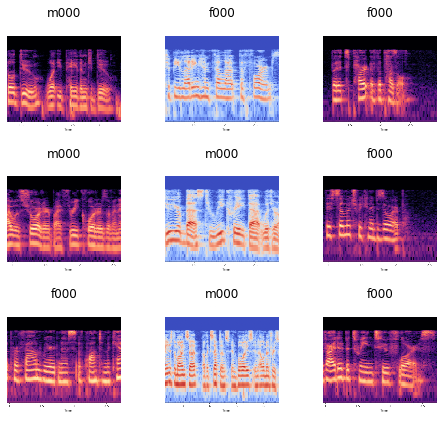

In [10]:
data.show_batch(rows= 3 , figsize=(7,6))

In [11]:
learner = cnn_learner(data,models.resnet34,metrics=error_rate)

In [12]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [13]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


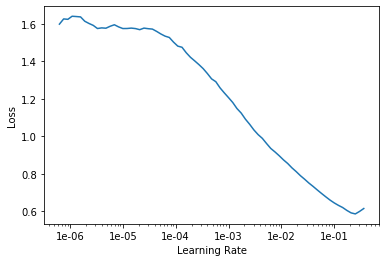

In [14]:
learner.recorder.plot()

In [15]:
lr=0.01

In [16]:
learner.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.501141,0.438131,0.101399,00:12
1,0.247385,0.084016,0.020979,00:11
2,0.147457,0.043636,0.013986,00:12
3,0.098367,0.029539,0.010490,00:11
4,0.065228,0.029180,0.010490,00:11


In [17]:
learner.save('stage-1')

In [18]:
learner.lr_find();

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


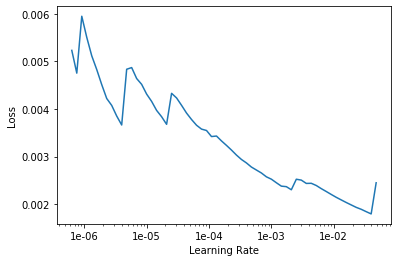

In [19]:
learner.recorder.plot()

In [34]:
learner.unfreeze()

In [20]:
learner.fit_one_cycle(2,slice(1e-04,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.006095,0.022984,0.010490,00:11
1,0.012800,0.025921,0.010490,00:11


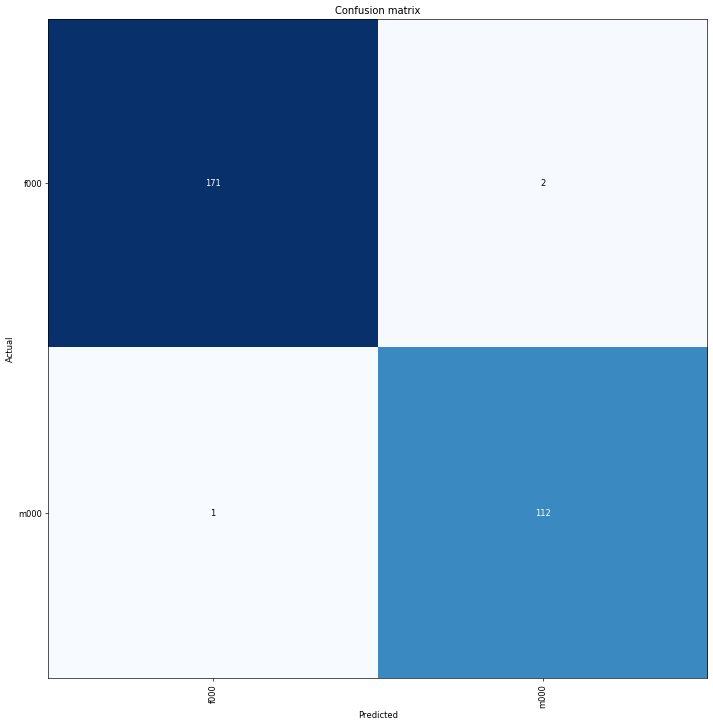

In [21]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

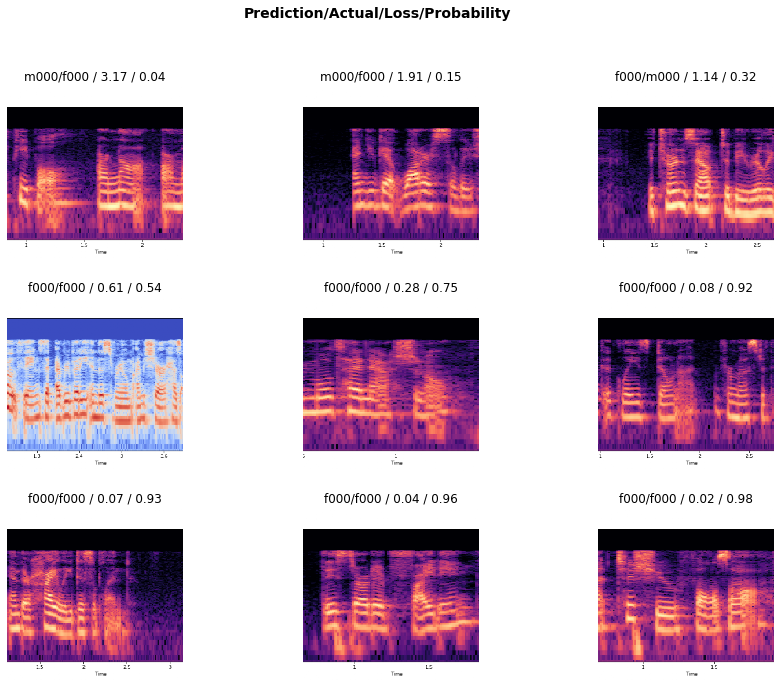

In [22]:
interp.plot_top_losses(9,figsize=(15,11))

In [23]:
interp.most_confused()

[('f000', 'm000', 2), ('m000', 'f000', 1)]

In [17]:
doc(interp.most_confused)

In [24]:
losses,idxs = interp.top_losses()

In [25]:
for p in data.valid_ds.x.items[idxs]:
    print(p)

data/Sound/American Sound Spectrograph/f0001_us_f0001_00182.png
data/Sound/American Sound Spectrograph/f0004_us_f0004_00372.png
data/Sound/American Sound Spectrograph/m0002_us_m0002_00004.png
data/Sound/American Sound Spectrograph/f0004_us_f0004_00321.png
data/Sound/American Sound Spectrograph/f0002_us_f0002_00325.png
data/Sound/American Sound Spectrograph/f0001_us_f0001_00180.png
data/Sound/American Sound Spectrograph/f0004_us_f0004_00074.png
data/Sound/American Sound Spectrograph/f0004_us_f0004_00307.png
data/Sound/American Sound Spectrograph/f0001_us_f0001_00294.png
data/Sound/American Sound Spectrograph/m0002_us_m0002_00019.png
data/Sound/American Sound Spectrograph/f0005_us_f0005_00439.png
data/Sound/American Sound Spectrograph/m0005_us_m0005_00078.png
data/Sound/American Sound Spectrograph/f0004_us_f0004_00417.png
data/Sound/American Sound Spectrograph/m0003_us_m0003_00348.png
data/Sound/American Sound Spectrograph/f0004_us_f0004_00322.png
data/Sound/American Sound Spectrograph/f

PRODUCTION

In [26]:
learner.export

<bound method Learner.export of Learner(data=ImageDataBunch;

Train: LabelList (1148 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
f000,f000,m000,f000,m000
Path: data/Sound/American Sound Spectrograph;

Valid: LabelList (286 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
f000,m000,f000,f000,f000
Path: data/Sound/American Sound Spectrograph;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  

In [27]:
def classname(t,name):
    if(not((name==tensor(1)and t=='m')or(name==tensor(0)and t=='f'))):
        return -1;

In [28]:
defaults.device = torch.device('cpu')
learn = load_learner(data_path)

Testing with 200 female Nepali Voice Dataset. All voices are female

In [39]:
audio_files = 'data/Sound/American Sound Spectrograph/Non American Sound'
audio_clips = os.listdir(audio_files)
correct=0
total=0
audio_clips.remove(".ipynb_checkpoints")
for temp in audio_clips:
    img = open_image(data_path/'Non American Sound'/temp)
    pred_idx,pred_class,outputs = learn.predict(img)
    if(pred_class==tensor(0)):
        correct+=1
    total+=1
print("Accuracy = ",correct/total)

Accuracy =  1.0
